In [1]:
# Tweepy - Python library for accessing the Twitter API.
import tweepy

# TextBlob - Python library for processing textual data
from textblob import TextBlob

# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud
from PIL import Image

# Pandas - Data manipulation and analysis library
import pandas as pd

# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

# Regular Expression Python module
import re

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

# Read Twitter Data with access keys
from TwitterAPI import TwitterAPI

# CSV - importing csv files
import csv

# Spacy - stopwords
import spacy

# SVM 
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Random samples
import random

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Token Keys

In [2]:
consumer_key= '78x0bUdLh5Rk6C6OIM3dQt17G'
consumer_secret= 'P0vJRX8SwA7SIwmKmKOxkhQZgm426T4YtoGqZcoCXGESxl7wqE'
access_token= '1377752601832357889-YF2jISPec89XAMzqf1K9hAOSN7pdq7'
access_token_secret= 'eHODWFlGklboaVu5Ve6c5wR3h2dxV9UFqdbLtrzYAj5B3'

# Twitter API Auth

In [3]:
def get_twitter_api():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth, wait_on_rate_limit = True)
    return api

# Data Extraction

In [4]:
def get_twitter():
    twitter = TwitterAPI(consumer_key,consumer_secret,access_token,access_token_secret)
    return twitter
twitter = get_twitter()

#filter tweets

In [5]:
def get_tweet(twitter,query):
    list_tweet = []
    new_query = query + " -filter:retweets" #This will help to remove Retweets
    tweets = tweepy.Cursor(twitter.search, q=new_query, tweet_mode='extended', lang="en").items(5000)
    for tweet in tweets:
        tweets_dict = {}
        if tweet.full_text not in tweets_dict:
            tweets_dict['text'] = tweet.full_text
            list_tweet.append(tweets_dict)
    return list_tweet

# Cleaning Tweets

In [6]:
def tweet_cleaner(jargons):
    
    in_list = list(jargons)
    jargons = "".join(in_list)
    jargons = str(jargons.lower())
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)+"," ",jargons).split())
    clean_tweet = str(text)
    return str(clean_tweet)

# Create CSV

In [7]:
def create_csv_File(query,list_tweet):
    with open(query+".csv",'w') as wp:
        csv_writer = csv.writer(wp)
        csv_writer.writerow(["Tweet Text"])
        for item in list_tweet:
            clean_tweet = tweet_cleaner(item.values())
            csv_writer.writerow([clean_tweet])
    wp.close()
    print("File for ",query,"created!")

# Code Analysis

In [8]:
api = get_twitter_api()

query = ["TSLA + CCIV"]

for i in range(len(query)):
    list_tweet = get_tweet(api,query[i])
    create_csv_File(query[i],list_tweet)

File for  TSLA + CCIV created!


# Create Textblob objects of the tweets

In [9]:
def get_sentiment(csvfile):
    tweets_no_urls = pd.read_csv(csvfile)
    sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls["Tweet Text"]]
    sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
    sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "Tweet"])
    return sentiment_df

# Create CSV Sentiments

In [10]:
def get_sentiment_csv(sentiment_df, filename):
    data_neg = sentiment_df[sentiment_df["polarity"] < 0]
    data_pos = sentiment_df[sentiment_df["polarity"] >= 0]
    data_pos['polarity'] = 'positive'
    data_neg['polarity'] = 'negative'
    sentiment_df = pd.concat([data_pos,data_neg])
    sentiment_df.drop(sentiment_df[sentiment_df['Tweet'] == ''].index)
    sentiment_df.to_csv(filename, index = False)
    print("Polarity File created!")

In [11]:
def get_sentiment_val_csv(sentiment_df, filename):
    data_neg = sentiment_df[sentiment_df["polarity"] < 0]
    data_pos = sentiment_df[sentiment_df["polarity"] >= 0]
    data_pos['polarity'] = 1
    data_neg['polarity'] = 0
    sentiment_df = pd.concat([data_pos,data_neg])
    sentiment_df.drop(sentiment_df[sentiment_df['Tweet'] == ''].index)
    sentiment_df.to_csv(filename, index = False)
    print("Polarity classification File created!")

# Import file and convert into polarity

In [12]:
sentiment_df = get_sentiment("TSLA + CCIV.csv")

get_sentiment_csv(sentiment_df, "sentiment_polarity.csv")
get_sentiment_val_csv(sentiment_df, "sentiment_classification.csv")

sentiment_polarity_df = pd.read_csv("sentiment_polarity.csv")

Polarity File created!
Polarity classification File created!


# WordCloud Formulation

In [13]:
selected_words = ["awesome", "win", "prizes", "good", "high", "free", "great", "worth", "better", "much", "top",
                  "best", "trade", "tsla", "first", "one", "cciv", "right", "webull", "trade", "price", "gain", 
                  "short", "bad" , "small" , "hate", "far", "least", "hard", "stop", "wrong", "shortage", "late", 
                  "shit", "back", "share", "market",  "stock", "sell", "gme", "holding", "ev"]

In [14]:
#Positive Sentiments

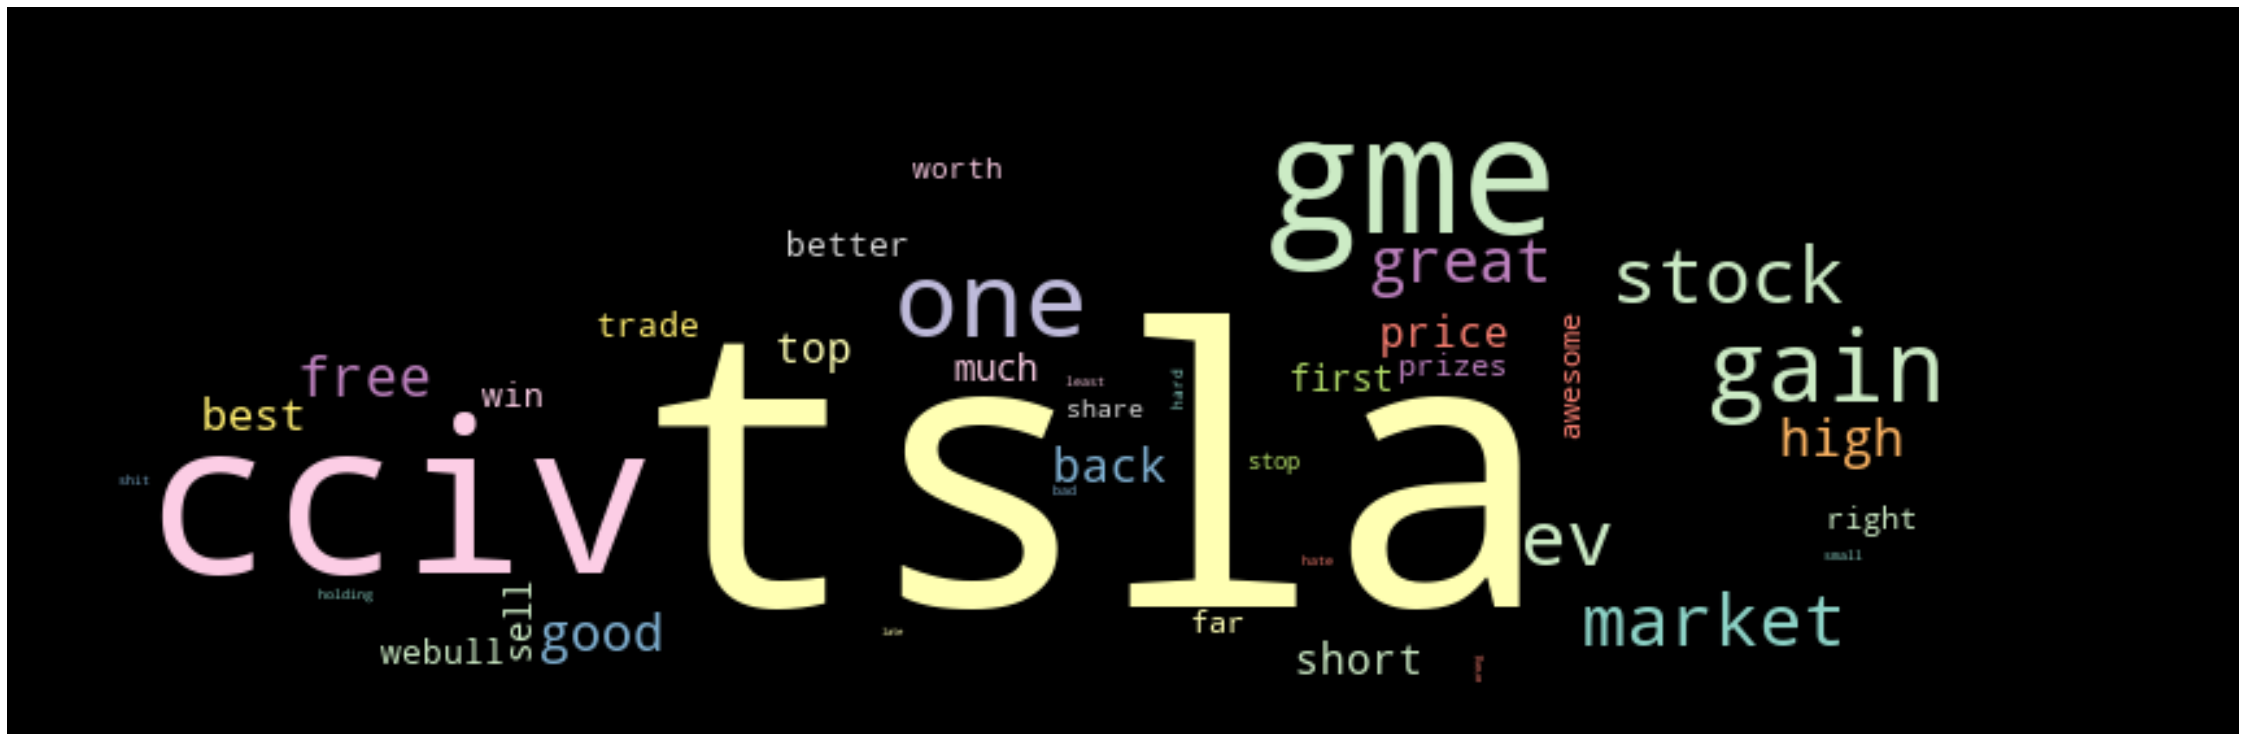

In [17]:
tweets_pos = sentiment_polarity_df[sentiment_polarity_df["polarity"] == 'positive']

all_words = ' '.join([text for text in tweets_pos["Tweet"]])

selected_words_new_pos = ' '.join([text for text in all_words.split() if text in selected_words])

tesla_mask = np.array(Image.open("teslacar.png"))

wordcloud = WordCloud(width = 2000, height = 3000, max_words = 100, random_state=3, background_color='black',
                      max_font_size=500, colormap='Set3', collocations=False, 
                      mask = tesla_mask).generate(selected_words_new_pos)

plt.figure(figsize=(40, 30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [18]:
#Negative Sentiments

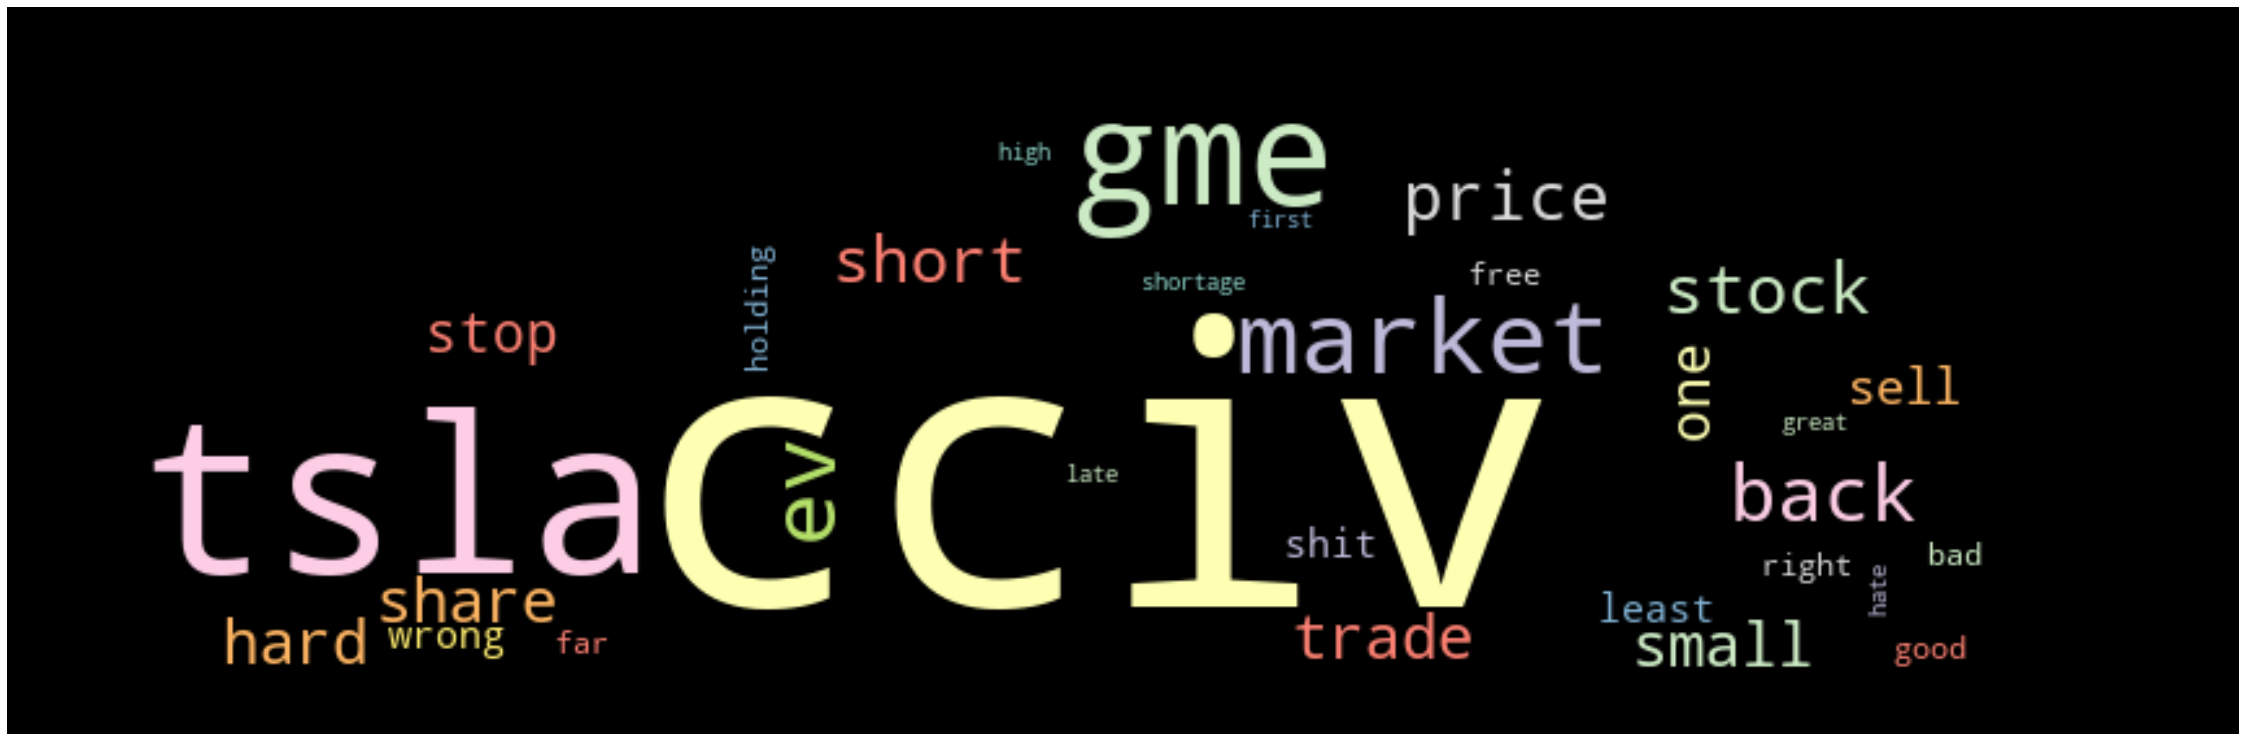

In [19]:
tweets_neg = sentiment_polarity_df[sentiment_polarity_df["polarity"] == 'negative']

all_words = ' '.join([text for text in tweets_neg["Tweet"]])

selected_words_new_neg = ' '.join([text for text in all_words.split() if text in selected_words])

tesla_mask = np.array(Image.open("teslacar.png"))

wordcloud = WordCloud(width = 2000, height = 3000, max_words = 100, random_state=3, background_color='black',
                      max_font_size=500, colormap='Set3', collocations=False, 
                      mask = tesla_mask).generate(selected_words_new_neg)

plt.figure(figsize=(40, 30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# SVM Algorithm

In [20]:
# Split Test and Train DataSet

In [21]:
sentiment_df_train, sentiment_df_test = train_test_split(sentiment_polarity_df, test_size=0.33)
print(sentiment_df_train)
print(sentiment_df_test)

     polarity                                              Tweet
474  positive  gik huge merger news eyeing a move to atleast ...
333  positive  stocks for breakfast live pre market live stoc...
589  positive  24h most mentioned tickers 1 nflx 47 2 tsla 44...
687  positive  sndlto4dot20for420 igot420sndlshares retweet t...
55   positive  fightthemarketmakers dtcc shortsqueeze secdoyo...
..        ...                                                ...
344  positive  amc dal ual czr tsla dkng aal penn dax30 cac40...
473  positive  nonstop american airlines flights from stl to ...
6    positive  enjoy the weekend next week though cciv lcid c...
664  positive  safemoon dogeday420 dogecoin xrp btc spy tlry ...
2    positive  crsr great er last quarter did offering and go...

[915 rows x 2 columns]
      polarity                                              Tweet
466   positive  amc dal ual czr tsla dkng aal penn dax30 cac40...
319   positive  not just travel expects to double in size in a..

In [22]:
# Create feature vectors

In [23]:
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

train_vectors = vectorizer.fit_transform(sentiment_df_train['Tweet'])
test_vectors = vectorizer.transform(sentiment_df_test['Tweet'])

In [24]:
# Perform classification with SVM, kernel=linear

In [25]:
random.seed(1234)

classifier_linear = svm.SVC(kernel='linear', C=1.0)
t0 = time.time()
classifier_linear.fit(train_vectors, sentiment_df_train['polarity'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))

Training time: 0.086019s; Prediction time: 0.034373s


# SVM Results

In [30]:
def accuracy_report(test_acc_labels,predicted_acc_labels):
    res_class_report = classification_report(test_acc_labels,predicted_acc_labels)
    return res_class_report;

accuracy_report = accuracy_report(sentiment_df_test['polarity'], prediction_linear)

print(accuracy_report)

              precision    recall  f1-score   support

    negative       0.50      0.06      0.10        52
    positive       0.89      0.99      0.94       399

    accuracy                           0.88       451
   macro avg       0.69      0.53      0.52       451
weighted avg       0.84      0.88      0.84       451



In [31]:
def conf_matrix(test_acc_labels,predicted_acc_labels):
    conf_matrix = confusion_matrix(test_acc_labels, predicted_acc_labels)
    return conf_matrix;

conf_matrix = conf_matrix(sentiment_df_test['polarity'], prediction_linear)

print(conf_matrix)

[[  3  49]
 [  3 396]]


# Pickling the vectorizer and model

In [32]:
import pickle
# pickling the vectorizer
pickle.dump(vectorizer, open('vectorizer.sav', 'wb'))
# pickling the model
pickle.dump(classifier_linear, open('classifier.sav', 'wb'))

# Demo the sentimental analysis

In [ ]:
review = "Tesla is doing a great job"

review_vector = vectorizer.transform([review]) # vectorizing
print(classifier_linear.predict(review_vector))

In [ ]:
Combining this with additional information about likes and comments can be very useful from marketing point of view and can enable us to find some correlation betweein polarity and the engagement our the users for a specified Tweeeter account.

We encourage you to experiment more with this example and come up with some more ideas how this can be used in practice.